In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("PartD_Prescriber_PUF_NPI_14/PartD_Prescriber_PUF_NPI_14.txt", delimiter="\t")

In [3]:
df.columns

Index([u'NPI', u'NPPES_PROVIDER_LAST_ORG_NAME', u'NPPES_PROVIDER_FIRST_NAME',
       u'NPPES_PROVIDER_MI', u'NPPES_CREDENTIALS', u'NPPES_PROVIDER_GENDER',
       u'NPPES_ENTITY_CODE', u'NPPES_PROVIDER_STREET1',
       u'NPPES_PROVIDER_STREET2', u'NPPES_PROVIDER_CITY',
       u'NPPES_PROVIDER_ZIP5', u'NPPES_PROVIDER_ZIP4', u'NPPES_PROVIDER_STATE',
       u'NPPES_PROVIDER_COUNTRY', u'SPECIALTY_DESCRIPTION',
       u'DESCRIPTION_FLAG', u'MEDICARE_PRVDR_ENROLL_STATUS', u'BENE_COUNT',
       u'TOTAL_CLAIM_COUNT', u'TOTAL_DRUG_COST', u'TOTAL_DAY_SUPPLY',
       u'BENE_COUNT_GE65', u'BENE_COUNT_GE65_SUPPRESS_FLAG',
       u'TOTAL_CLAIM_COUNT_GE65', u'GE65_SUPPRESS_FLAG',
       u'TOTAL_DRUG_COST_GE65', u'TOTAL_DAY_SUPPLY_GE65', u'BRAND_CLAIM_COUNT',
       u'BRAND_SUPPRESS_FLAG', u'BRAND_DRUG_COST', u'GENERIC_CLAIM_COUNT',
       u'GENERIC_SUPPRESS_FLAG', u'GENERIC_DRUG_COST', u'OTHER_CLAIM_COUNT',
       u'OTHER_SUPPRESS_FLAG', u'OTHER_DRUG_COST', u'MAPD_CLAIM_COUNT',
       u'MAPD_SUPPRESS_

In [4]:
NJ = df[df["NPPES_PROVIDER_STATE"] == "NJ"]

In [5]:
NJ["NPI"].unique()

array([1497965024, 1962475566, 1336129071, ..., 1841346392, 1962508176,
       1538202916])

In [7]:
topNJop = NJ.sort_values("OPIOID_CLAIM_COUNT", ascending=False)

In [22]:
NJ.groupby("NPPES_PROVIDER_CITY").sum().iloc[:,26].sort_values(ascending=False)

NPPES_PROVIDER_CITY
TOMS RIVER              42241.0
NEWARK                  28778.0
CAMDEN                  28701.0
JERSEY CITY             28691.0
EDISON                  25073.0
VOORHEES                24927.0
CLIFTON                 24320.0
CHERRY HILL             23527.0
HAMILTON                23243.0
BAYONNE                 22569.0
VINELAND                21564.0
HACKENSACK              21005.0
MARLTON                 20995.0
BRICK                   19964.0
WAYNE                   19522.0
STRATFORD               17961.0
MORRISTOWN              17364.0
PARAMUS                 17229.0
FREEHOLD                16457.0
MOUNT LAUREL            16088.0
HAMMONTON               15600.0
ENGLEWOOD               15347.0
PATERSON                15284.0
TRENTON                 14750.0
WOODBURY                14557.0
SEWELL                  14364.0
NEW BRUNSWICK           13346.0
BELLEVILLE              13181.0
CAPE MAY COURT HOUSE    13022.0
ELIZABETH               12995.0
                    

In [15]:
import matplotlib.pyplot as plt
# This Jupyter magic function will draw our charts right into the notebook
%matplotlib inline

In [5]:
NJ["OPIOID_CLAIM_COUNT"]= NJ["OPIOID_CLAIM_COUNT"].convert_objects(convert_numeric=True)

/Users/epetenko/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Users/epetenko/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
NJ["OPIOID_CLAIM_COUNT"].describe()

/Users/epetenko/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    20762.000000
mean        71.290145
std        189.923707
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max       4427.000000
Name: OPIOID_CLAIM_COUNT, dtype: float64

In [8]:
NJ["OPIOID_CLAIM_COUNT"] = NJ["OPIOID_CLAIM_COUNT"].fillna(value=0)

/Users/epetenko/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
NJ['TOTAL_CLAIM_COUNT'] = NJ['TOTAL_CLAIM_COUNT'].fillna(value=0)

/Users/epetenko/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
NJ.head()

,NPI,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_MI,NPPES_CREDENTIALS,NPPES_PROVIDER_GENDER,NPPES_ENTITY_CODE,NPPES_PROVIDER_STREET1,NPPES_PROVIDER_STREET2,NPPES_PROVIDER_CITY,...,ANTIBIOTIC_CLAIM_COUNT,ANTIBIOTIC_DRUG_COST,HRM_BENE_COUNT_GE65,HRM_BENE_GE65_SUPPRESS_FLAG,HRM_CLAIM_COUNT_GE65,HRM_GE65_SUPPRESS_FLAG,HRM_DRUG_COST_GE65,ANTI_PSYCH_BENE_COUNT,ANTI_PSYCH_CLAIM_COUNT,ANTI_PSYCH_DRUG_COST
88,1497965024,AARON,ANGELA,NaN,DDS,F,I,464 VALLEY BROOK AVE,NaN,LYNDHURST,...,21.0,102.27,NaN,*,NaN,*,NaN,0.0,0.0,0.0
89,1962475566,AARON,BERNARD,NaN,M.D.,M,I,1640 ROUTE 88 W,SUITE 202,BRICK,...,19.0,875.19,NaN,*,NaN,*,NaN,NaN,NaN,NaN
124,1336129071,AARON,MICHAEL,R,D.O.,M,I,1820 STATE ROUTE 33,SUITE 4B,NEPTUNE,...,24.0,155.11,46.0,NaN,169.0,NaN,9927.18,NaN,NaN,NaN
150,1194982470,AARONS,DARRYL,H,DO,M,I,600 W SHORE DR,NaN,BRIGANTINE,...,NaN,NaN,0.0,NaN,0.0,NaN,0.00,0.0,0.0,0.0
205,1861549925,AASMAA,SIRIKE,T,DO,F,I,170 CHANGEBRIDGE RD,SUITE D1,MONTVILLE,...,110.0,18346.42,45.0,NaN,163.0,NaN,9958.29,NaN,NaN,NaN


In [11]:
NJ["PCNT_OPIOID"] = NJ["OPIOID_CLAIM_COUNT"]/NJ['TOTAL_CLAIM_COUNT']*100

/Users/epetenko/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
NJ.head()

,NPI,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_MI,NPPES_CREDENTIALS,NPPES_PROVIDER_GENDER,NPPES_ENTITY_CODE,NPPES_PROVIDER_STREET1,NPPES_PROVIDER_STREET2,NPPES_PROVIDER_CITY,...,ANTIBIOTIC_DRUG_COST,HRM_BENE_COUNT_GE65,HRM_BENE_GE65_SUPPRESS_FLAG,HRM_CLAIM_COUNT_GE65,HRM_GE65_SUPPRESS_FLAG,HRM_DRUG_COST_GE65,ANTI_PSYCH_BENE_COUNT,ANTI_PSYCH_CLAIM_COUNT,ANTI_PSYCH_DRUG_COST,PCNT_OPIOID
88,1497965024,AARON,ANGELA,NaN,DDS,F,I,464 VALLEY BROOK AVE,NaN,LYNDHURST,...,102.27,NaN,*,NaN,*,NaN,0.0,0.0,0.0,0.000000
89,1962475566,AARON,BERNARD,NaN,M.D.,M,I,1640 ROUTE 88 W,SUITE 202,BRICK,...,875.19,NaN,*,NaN,*,NaN,NaN,NaN,NaN,0.000000
124,1336129071,AARON,MICHAEL,R,D.O.,M,I,1820 STATE ROUTE 33,SUITE 4B,NEPTUNE,...,155.11,46.0,NaN,169.0,NaN,9927.18,NaN,NaN,NaN,0.000000
150,1194982470,AARONS,DARRYL,H,DO,M,I,600 W SHORE DR,NaN,BRIGANTINE,...,NaN,0.0,NaN,0.0,NaN,0.00,0.0,0.0,0.0,0.000000
205,1861549925,AASMAA,SIRIKE,T,DO,F,I,170 CHANGEBRIDGE RD,SUITE D1,MONTVILLE,...,18346.42,45.0,NaN,163.0,NaN,9958.29,NaN,NaN,NaN,2.332815


In [13]:
# NJ.to_csv("Percent_opioid.csv")

In [17]:
NJ.sort_values("PCNT_OPIOID", ascending=False).head(15)

,NPI,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_MI,NPPES_CREDENTIALS,NPPES_PROVIDER_GENDER,NPPES_ENTITY_CODE,NPPES_PROVIDER_STREET1,NPPES_PROVIDER_STREET2,NPPES_PROVIDER_CITY,...,ANTIBIOTIC_DRUG_COST,HRM_BENE_COUNT_GE65,HRM_BENE_GE65_SUPPRESS_FLAG,HRM_CLAIM_COUNT_GE65,HRM_GE65_SUPPRESS_FLAG,HRM_DRUG_COST_GE65,ANTI_PSYCH_BENE_COUNT,ANTI_PSYCH_CLAIM_COUNT,ANTI_PSYCH_DRUG_COST,PCNT_OPIOID
501860,1629073945,KLEIN,IRA,A,M.D.,M,I,29 E 29TH ST,NaN,BAYONNE,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,100.000000
403153,1013948579,HERSH,CHRISTINE,M,PA,F,I,2 WORLDS FAIR DR,NaN,SOMERSET,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,100.000000
755563,1518114362,PINSKY,TIMMIE,A,D.O.,M,I,55 E ROUTE 70,SUITE 3,MARLTON,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,100.000000
521570,1881894285,KUO,DOUGLAS,NaN,D.O.,M,I,370 W PLEASANTVIEW AVE # 2-164,NaN,HACKENSACK,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,100.000000
662677,1760529267,MOSER,ROBERT,NaN,MD,M,I,3131 PRINCETON PIKE,5-110,LAWRENCEVILLE,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,100.000000
647859,1881981348,MITEV,PETKO,P,PA-C,M,I,1 DIAMOND HILL RD,NaN,BERKELEY HEIGHTS,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,94.520548
881840,1629055637,SHIH,DUEN,NaN,MD,M,I,600 PAVONIA AVE,NaN,JERSEY CITY,...,NaN,NaN,*,NaN,*,NaN,0.0,0.0,0.0,93.530997
473849,1194881730,KARCNIK,MARGARET,NaN,D.O.,F,I,18 REDNECK AVE,NaN,LITTLE FERRY,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,93.333333
834239,1932426616,SAGARWALA,ADAM,NaN,D.O.,M,I,201 LYONS AVE,NaN,NEWARK,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,93.333333
635541,1992962351,MEYER,SARAH,E,M.D.,F,I,8 HILLSIDE AVE,SUITE 106,MONTCLAIR,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,92.857143


(array([  2.26360000e+04,   1.69600000e+03,   8.92000000e+02,
          7.69000000e+02,   7.58000000e+02,   6.66000000e+02,
          5.35000000e+02,   3.58000000e+02,   3.12000000e+02,
          2.66000000e+02,   2.61000000e+02,   2.31000000e+02,
          2.20000000e+02,   1.63000000e+02,   9.70000000e+01,
          7.40000000e+01,   4.20000000e+01,   2.70000000e+01,
          1.70000000e+01,   5.00000000e+00]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  100.]),
 <a list of 20 Patch objects>)

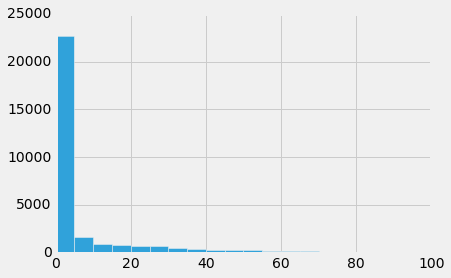

In [19]:
plt.style.use('fivethirtyeight')
plt.hist(NJ["PCNT_OPIOID"], bins=20)

In [22]:
NJopioid= NJ[['NPPES_PROVIDER_LAST_ORG_NAME', 'NPPES_PROVIDER_FIRST_NAME','NPPES_PROVIDER_CITY',
       'NPPES_PROVIDER_ZIP5', 'NPPES_PROVIDER_ZIP4', 'NPPES_PROVIDER_STATE','SPECIALTY_DESCRIPTION','OPIOID_BENE_COUNT',
       'OPIOID_CLAIM_COUNT', 'OPIOID_DRUG_COST', 'OPIOID_DAY_SUPPLY', "PCNT_OPIOID"]]

In [31]:
NJopioid.head()

,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_CITY,NPPES_PROVIDER_ZIP5,NPPES_PROVIDER_ZIP4,NPPES_PROVIDER_STATE,SPECIALTY_DESCRIPTION,OPIOID_BENE_COUNT,OPIOID_CLAIM_COUNT,OPIOID_DRUG_COST,OPIOID_DAY_SUPPLY,PCNT_OPIOID,SUPP_PER_BEN
88,AARON,ANGELA,LYNDHURST,7071.0,1998.0,NJ,Dentist,NaN,0.0,NaN,NaN,0.000000,NaN
89,AARON,BERNARD,BRICK,8724.0,3036.0,NJ,Gastroenterology,NaN,0.0,NaN,NaN,0.000000,NaN
124,AARON,MICHAEL,NEPTUNE,7753.0,4860.0,NJ,Cardiology,NaN,0.0,NaN,NaN,0.000000,NaN
150,AARONS,DARRYL,BRIGANTINE,8203.0,2621.0,NJ,General Practice,0.0,0.0,0.0,0.0,0.000000,NaN
205,AASMAA,SIRIKE,MONTVILLE,7045.0,NaN,NJ,Internal Medicine,19.0,75.0,1638.8,1761.0,2.332815,92.684211


In [25]:
NJopioid["SUPP_PER_BEN"] = NJopioid["OPIOID_DAY_SUPPLY"]/NJopioid["OPIOID_BENE_COUNT"]

/Users/epetenko/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
NJopioid.sort_values(by="SUPP_PER_BEN", ascending=False).head(10)

,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_CITY,NPPES_PROVIDER_ZIP5,NPPES_PROVIDER_ZIP4,NPPES_PROVIDER_STATE,SPECIALTY_DESCRIPTION,OPIOID_BENE_COUNT,OPIOID_CLAIM_COUNT,OPIOID_DRUG_COST,OPIOID_DAY_SUPPLY,PCNT_OPIOID,SUPP_PER_BEN
354848,GREENBERG,ANTHONY,COLUMBIA,7832.0,2523.0,NJ,Family Practice,36.0,978.0,138618.98,23952.0,58.283671,665.333333
886919,SIDDIQUI,ASMA,MATAWAN,7747.0,2158.0,NJ,Physical Medicine and Rehabilitation,108.0,2423.0,1215523.96,67265.0,60.198758,622.824074
685949,NEWMARK,THOMAS,CHERRY HILL,8002.0,2051.0,NJ,Psychiatry,19.0,464.0,147073.37,11080.0,32.954545,583.157895
132792,BYAHATTI,PRAMILA,SOUTH PLAINFIELD,7080.0,NaN,NJ,Anesthesiology,11.0,231.0,37634.70,5732.0,85.873606,521.090909
379092,HANNA,MAMDOUH,BAYONNE,7002.0,4654.0,NJ,Anesthesiology,53.0,1429.0,124554.57,25951.0,64.543812,489.641509
141680,CARABELLI,ROBERT,HAMILTON,8619.0,3831.0,NJ,Physical Medicine and Rehabilitation,127.0,2508.0,637248.29,58930.0,68.078176,464.015748
987087,VALENZA,JOSEPH,CHESTER,7930.0,2141.0,NJ,Physical Medicine and Rehabilitation,111.0,1818.0,877474.79,51000.0,78.906250,459.459459
192498,CORAZON,ALEXIS,PATERSON,7502.0,2125.0,NJ,Infectious Disease,163.0,2635.0,888705.67,74377.0,13.367492,456.300613
916436,SPINAPOLICE,JOSEPH,RIVER EDGE,7661.0,1101.0,NJ,Family Practice,69.0,1084.0,165580.37,30903.0,76.338028,447.869565
192275,COPLIN,BRUCE,TOMS RIVER,8755.0,6401.0,NJ,Physical Medicine and Rehabilitation,290.0,4396.0,580053.02,129179.0,66.900015,445.444828


In [29]:
NJopioid.corr()

,NPPES_PROVIDER_ZIP5,NPPES_PROVIDER_ZIP4,OPIOID_BENE_COUNT,OPIOID_CLAIM_COUNT,OPIOID_DRUG_COST,OPIOID_DAY_SUPPLY,PCNT_OPIOID,SUPP_PER_BEN
NPPES_PROVIDER_ZIP5,1.000000,0.062702,0.046982,0.017738,0.015760,0.023116,0.017099,0.004866
NPPES_PROVIDER_ZIP4,0.062702,1.000000,0.026626,0.008675,0.005113,0.005086,0.028846,-0.041644
OPIOID_BENE_COUNT,0.046982,0.026626,1.000000,0.807254,0.477624,0.748533,0.462223,0.259150
OPIOID_CLAIM_COUNT,0.017738,0.008675,0.807254,1.000000,0.759347,0.972101,0.333353,0.602525
OPIOID_DRUG_COST,0.015760,0.005113,0.477624,0.759347,1.000000,0.788073,0.228612,0.518141
OPIOID_DAY_SUPPLY,0.023116,0.005086,0.748533,0.972101,0.788073,1.000000,0.242717,0.640519
PCNT_OPIOID,0.017099,0.028846,0.462223,0.333353,0.228612,0.242717,1.000000,-0.098029
SUPP_PER_BEN,0.004866,-0.041644,0.259150,0.602525,0.518141,0.640519,-0.098029,1.000000


In [13]:
NJopoid["OPIOID_CLAIM_COUNT"].describe()

count    20762.000000
mean        71.290145
std        189.923707
min          0.000000
25%          0.000000
50%         18.000000
75%         61.000000
max       4427.000000
Name: OPIOID_CLAIM_COUNT, dtype: float64

In [12]:
# NJopoid.to_csv("Top_opioid_prescribers.csv")

(array([  1.91730000e+04,   9.67000000e+02,   2.85000000e+02,
          1.22000000e+02,   8.00000000e+01,   4.80000000e+01,
          2.10000000e+01,   1.50000000e+01,   1.20000000e+01,
          9.00000000e+00,   1.20000000e+01,   6.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00]),
 array([    0.  ,   221.35,   442.7 ,   664.05,   885.4 ,  1106.75,
         1328.1 ,  1549.45,  1770.8 ,  1992.15,  2213.5 ,  2434.85,
         2656.2 ,  2877.55,  3098.9 ,  3320.25,  3541.6 ,  3762.95,
         3984.3 ,  4205.65,  4427.  ]),
 <a list of 20 Patch objects>)

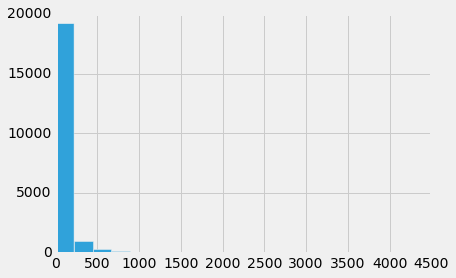

In [18]:
plt.style.use('fivethirtyeight')
plt.hist(NJopoidjustpre["OPIOID_CLAIM_COUNT"], bins=20)

In [22]:
topdocs = NJopoid[["NPPES_PROVIDER_LAST_ORG_NAME", "NPPES_PROVIDER_FIRST_NAME","OPIOID_CLAIM_COUNT"]].sort_values("OPIOID_CLAIM_COUNT", ascending=False).head(15)

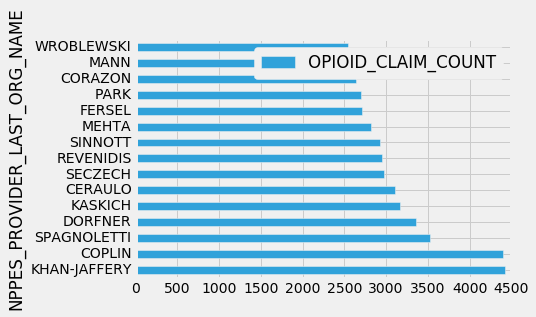

In [23]:
topdocs = topdocs.set_index("NPPES_PROVIDER_LAST_ORG_NAME")

topdocs.plot(kind="barh")

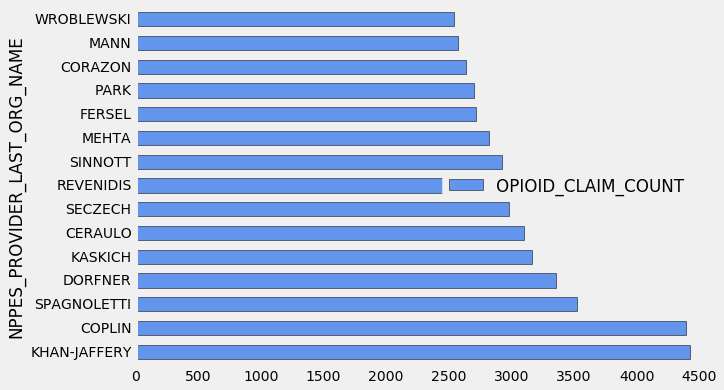

In [24]:
Docschart = topdocs.plot(kind="barh", 
                        figsize=[9, 6], 
                        width=0.6, 
                        color=["cornflowerblue", "#FFA07A"], 
                        edgecolor="k", 
                        grid=False) # New parameter: turn off grids

In [30]:
NJ.pivot_table(index=['NPPES_PROVIDER_ZIP5'],values='OPIOID_CLAIM_COUNT',aggfunc=sum).head(10)

NPPES_PROVIDER_ZIP5
807.0        15.0
3070.0        0.0
5857.0        0.0
7001.0     1602.0
7002.0    22569.0
7003.0     4521.0
7004.0      481.0
7005.0      704.0
7006.0     3128.0
7008.0     2087.0
Name: OPIOID_CLAIM_COUNT, dtype: float64

In [28]:
#downloaded Fentanyl-specific data from the detailed Medicare data
NJfent = pd.read_csv("Medicare_Provider_Utilization_and_Payment_Data__2014_Part_D_Prescriber_fentanyl.csv")

In [30]:
NJfent.columns

Index([u'NPI', u'NPPES_PROVIDER_LAST_ORG_NAME', u'NPPES_PROVIDER_FIRST_NAME',
       u'NPPES_PROVIDER_CITY', u'NPPES_PROVIDER_STATE', u'SPECIALTY_DESC',
       u'DESCRIPTION_FLAG', u'DRUG_NAME', u'GENERIC_NAME', u'BENE_COUNT',
       u'TOTAL_CLAIM_COUNT', u'TOTAL_DAY_SUPPLY', u'TOTAL_DRUG_COST',
       u'BENE_COUNT_GE65', u'BENE_COUNT_GE65_SUPPRESS_FLAG',
       u'TOTAL_CLAIM_COUNT_GE65', u'GE65_SUPPRESS_FLAG',
       u'TOTAL_DAY_SUPPLY_GE65', u'TOTAL_DRUG_COST_GE65'],
      dtype='object')

(array([  1.12600000e+03,   3.55000000e+02,   1.94000000e+02,
          9.50000000e+01,   5.20000000e+01,   3.80000000e+01,
          2.10000000e+01,   2.10000000e+01,   1.00000000e+01,
          1.30000000e+01,   1.00000000e+01,   1.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00]),
 array([  11.  ,   28.85,   46.7 ,   64.55,   82.4 ,  100.25,  118.1 ,
         135.95,  153.8 ,  171.65,  189.5 ,  207.35,  225.2 ,  243.05,
         260.9 ,  278.75,  296.6 ,  314.45,  332.3 ,  350.15,  368.  ]),
 <a list of 20 Patch objects>)

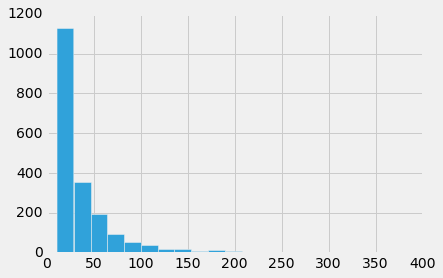

In [31]:
plt.hist(NJfent["TOTAL_CLAIM_COUNT"], bins=20)

In [33]:
NJfent["DRUG_NAME"].unique()

array(['FENTANYL', 'DURAGESIC', 'SUBSYS'], dtype=object)

In [34]:
subsys = NJfent[NJfent["DRUG_NAME"]=="SUBSYS"]
duragesic = NJfent[NJfent["DRUG_NAME"]=="DURAGESIC"]
fent = NJfent[NJfent["DRUG_NAME"]=="FENTANYL"]

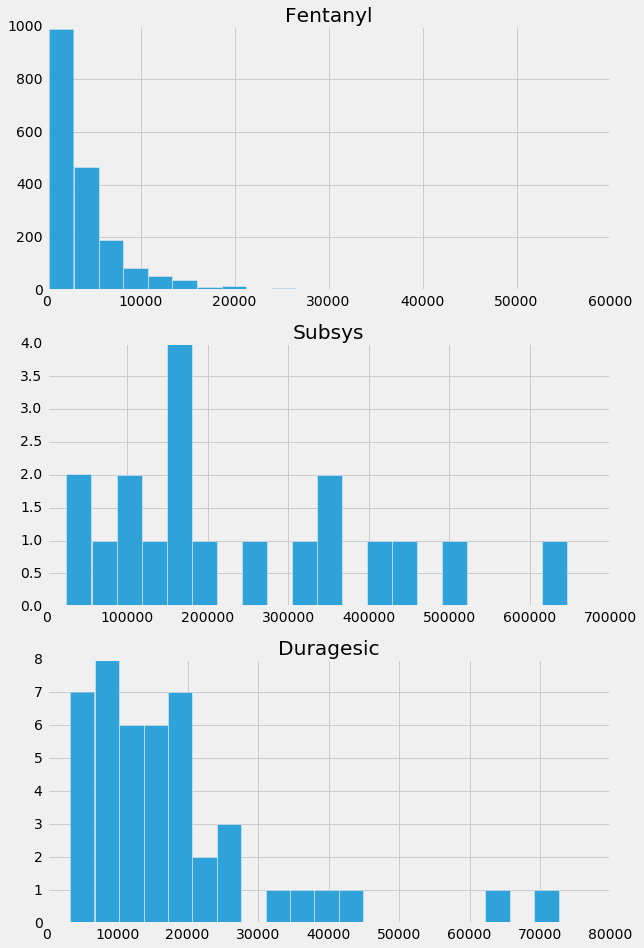

In [42]:
#creating Matplotlib histograms
fig = plt.figure(figsize=[9, 15])


ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)



ax1.hist(fent["TOTAL_DRUG_COST"], bins=20)
ax1.set_title("Fentanyl")

ax2.hist(subsys["TOTAL_DRUG_COST"], bins=20)
ax2.set_title("Subsys")

ax3.hist(duragesic["TOTAL_DRUG_COST"], bins=20)
ax3.set_title("Duragesic")

In [45]:
# fig = plt.figure(figsize=[9, 15])

# bx1 = fig.add_subplot(311)
# bx2 = fig.add_subplot(312)
# bx3 = fig.add_subplot(313)

# bx1.boxplot(fent["TOTAL_DRUG_COST"])
# bx1.set_title("Fentanyl")

# bx2.boxplot(subsys["TOTAL_DRUG_COST"])
# bx2.set_title("Subsys")

# bx3.boxplot(duragesic["TOTAL_DRUG_COST"])
# bx3.set_title("Duragesic")

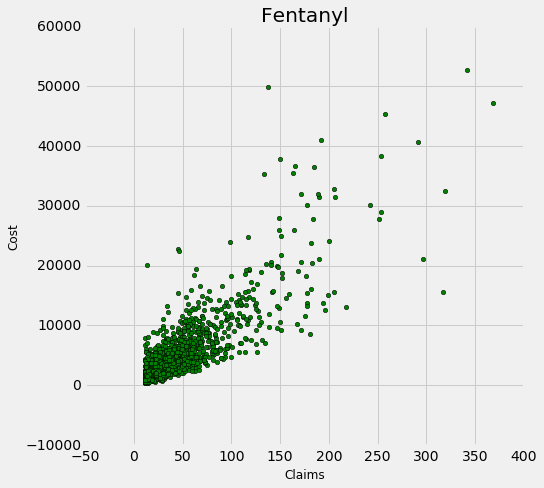

In [47]:
def scatter_plot(dataframe, x, y, title="", xlabel="", ylabel="", color="g", ylim=None):
    ax = dataframe.plot(kind="scatter", figsize=[7, 7], x = x, y = y, color=color, 
                        edgecolor="k", ylim=ylim )
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.show()  


scatter_plot(fent, "TOTAL_CLAIM_COUNT", "TOTAL_DRUG_COST", "Fentanyl", "Claims", "Cost")


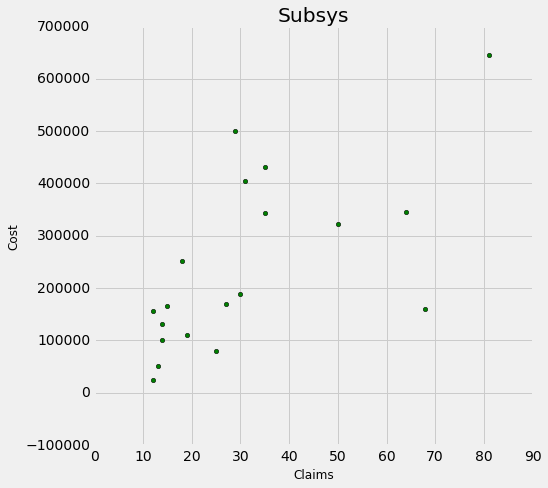

In [48]:
scatter_plot(subsys, "TOTAL_CLAIM_COUNT", "TOTAL_DRUG_COST", "Subsys", "Claims", "Cost")


In [76]:
# NJpivot = NJ.pivot_table(index=["NPPES_PROVIDER_ZIP5"], values='OPIOID_CLAIM_COUNT', aggfunc=sum)

In [77]:
# NJpivot.to_csv("Top_zip_codes.csv")